# Das Federpendel (Auswertung mit EDV)

Technische Universität Berlin, Straße des 17. Juni 135, 10623 Berlin, Deutschland

---

**Clarissa Pinheiro** (Kurs 348T)

E-mail: cvpinheiro13@gmail.com

**Sofía Rodríguez** (Kurs 348T)

E-mail: sofiaerb@hotmail.com

**Vasu Seghal** (Kurs 348T)

E-mail: vasusehgal10611@gmail.com 

**Allan A. Zea** (Kurs 348T)

E-mail: zealobo@campus.tu-berlin.de

---

### Beschreibung

Eines der bekanntesten Beispiele für harmonische Oszillatoren in der Physik ist das sogenannte Federpendel. Ein Federpendel besteht aus einer Schraubenfeder mit der Federkonstanten $c$ und einem daran befestigten Massestück $m$. Wird das System einmal angeregt, beginnt eine harmonische Schwingung um die Ruhelage. Wir wissen, dass für die Schwingungsdauer (die Zeit für eine Periode) $T=2\pi\sqrt{\frac{m}{c}}$ gelten muss.

Mithilfe einer Tabelle, die mehrere Messungen von 30-Perioden-Gruppen beinthaltet, werden wir hier Mittelwert und Fehler des Mittelwerts tabellarisch berechnen, eine Fehlerfortpflanzung durchführen und die entsprechenden Graphen anfertigen.

---

Zunächst laden wir die Daten von unserem Github-Verzeichnis, welches unter [dieser Webseite](https://github.com/allgebrist/studienkolleg-physik-praktikum) zu finden ist.

In [1]:
library(scales)
library(ggplot2)

fp_tabelle <- t(read.csv('Daten/federpendelmess.csv', header = TRUE, sep = ","))
str(fp_tabelle) 
fp_tabelle

 num [1:11, 1:4] 0.05 9.72 10.49 10.1 9.98 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:11] "Masse.kg" "T30.1" "T30.2" "T30.3" ...
  ..$ : NULL


Masse.kg,0.05,0.15,0.20,0.30
T30.1,9.72,13.32,16.45,18.83
T30.2,10.49,14.71,15.16,18.69
T30.3,10.10,14.00,15.59,18.83
T30.4,9.98,13.84,15.68,17.96
T30.5,10.34,13.94,15.70,19.02
T30.6,10.00,13.55,15.43,17.83
T30.7,10.00,13.89,16.03,18.96
T30.8,NA,NA,15.70,18.83
T30.9,NA,NA,NA,18.93
T30.10,NA,NA,NA,18.87


Wir wollen natürlich alle unseren Berechnungen durchführen, ohne die fehlenden Werte (sog. 'NA') mit zu berücksichtigen. Diesem Ziel dient die untere Anweisung. Dabei werden z.B. alle Werte der dritten Spalte außer den Fehlenden gezeigt.

In [2]:
# Mit dieser Anweisung bekommen wir alle Werte in
# der dritten Spalte, deren Wert ungleich 'NA' ist.
fp_tabelle[(which(fp_tabelle[2:11,3] != 'NA')+1), 3]

T30.1 T30.2 T30.3 T30.4 T30.5 T30.6 T30.7 T30.8 
16.45 15.16 15.59 15.68 15.70 15.43 16.03 15.70

Wir sind jetzt in der Lage, die Länge, den Mittelwert und die Standardabweichung für jede Datenmenge dieser Versuche zu ermitteln. 

In [3]:
laenge <- c()
mittelwerte <- c()
standard_abweichungen <- c()

for (k in 1:4) { 
  messungen <- c(fp_tabelle[(which(fp_tabelle[2:11, k] != 'NA')+1), k])
  laenge <- c(laenge, length(messungen))
  mittelwerte <- c(mittelwerte, mean(messungen))
  standard_abweichungen <- c(standard_abweichungen, sd(messungen))
}

Weil die Tabelle Messungen von 30 Periodendauern zeigt, müssen wir die Ergebnisse vom letzten Schritt erst mal durch 30 teilen, um die Fehler der Mittelwerte und die relative Fehler ausrechnen zu können.

In [4]:
mittelwerte <- mittelwerte / 30
standard_abweichungen <- standard_abweichungen / 30

fehler_mittel <- standard_abweichungen / laenge
rel_fehler <- fehler_mittel / mittelwerte

cat("\n Mittelwerte: ", mittelwerte, sep = "  ")
cat("\n Standardabweichungen: ", standard_abweichungen, sep = "  ")
cat("\n Fehler der Mittelwerte: ", fehler_mittel, sep = "  ")
cat("\n Relative Fehler: ", percent(rel_fehler), sep = "  ")


 Mittelwerte:   0.3363333  0.4630952  0.5239167  0.6225
 Standardabweichungen:   0.008474362  0.01446543  0.01288502  0.0140583
 Fehler der Mittelwerte:   0.001210623  0.00206649  0.001610628  0.00140583
 Relative Fehler:   0.360%  0.446%  0.307%  0.226%

In [5]:
per <- mittelwerte^2
cat("\n T1^2: ", per, sep = "  ")
cat("\n dT1^2: ", 2*rel_fehler*(per), sep = "  ")
cat("\n rel. T1^2: ", percent(2*rel_fehler*(mittelwerte^2)/per), sep = "  ")


 T1^2:   0.1131201  0.2144572  0.2744887  0.3875063
 dT1^2:   0.0008143459  0.001913963  0.00168767  0.001750258
 rel. T1^2:   0.720%  0.892%  0.615%  0.452%

---

### Grafik für $T^2(m)$


Call:
lm(formula = periode ~ masse, data = df_1)

Coefficients:
(Intercept)        masse  
    0.05463      1.10151  


Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


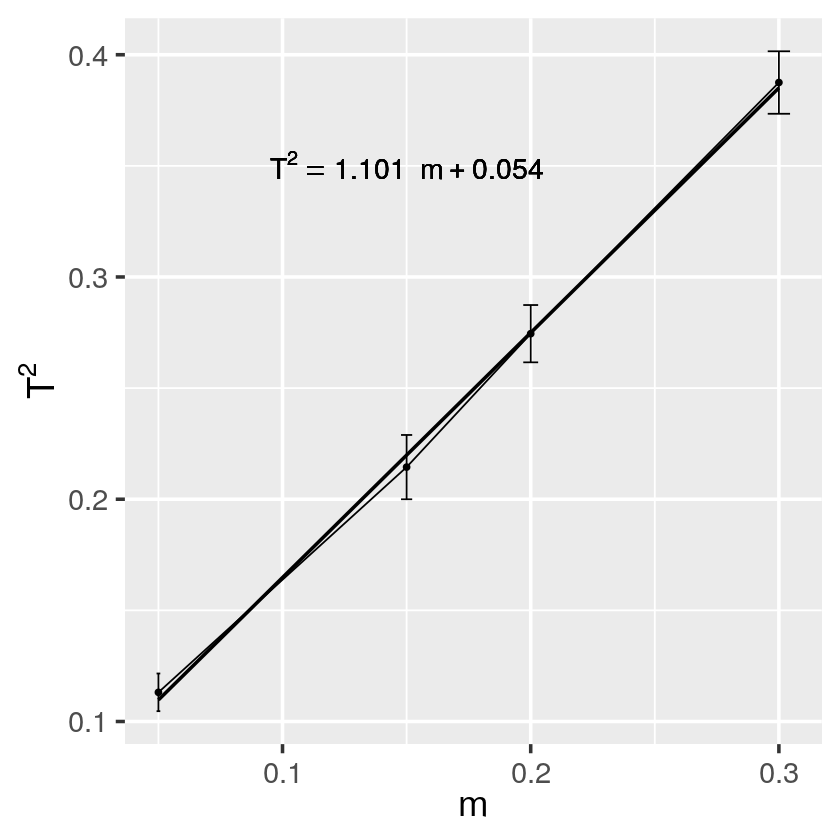

In [6]:
df_1 <- data.frame(masse = c(0.05, 0.15, 0.20, 0.30), periode = mittelwerte^2)

# Bestimmung von Steigung und T^2-Achsenabschnitt
# durch eine einfache lineare Regression
lr_1 <- lm(data = df_1, formula = periode ~ masse)
lr_1

p_1 <- ggplot(data = df_1, aes(x = masse, y = periode)) + 
       geom_line() + 
       geom_point() +
       geom_smooth(method = "lm", se = FALSE, color = "black", formula = y ~ x) +
       geom_text(x = 0.15, y = 0.35, label = expression(T^2==1.101~m+0.054), size = 6, parse = TRUE) +
       geom_errorbar(aes(ymin = periode - standard_abweichungen, 
                         ymax = periode + standard_abweichungen),
                     width = 0.03*c(0.05, 0.15, 0.20, 0.30))

p_1 + labs(x = expression(m), y = expression(T^2)) + theme_grey(base_size = 22)

---

### Grafik für $T(\sqrt{m})$


Call:
lm(formula = periode ~ masse, data = df_2)

Coefficients:
(Intercept)        masse  
     0.1334       0.8793  


Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


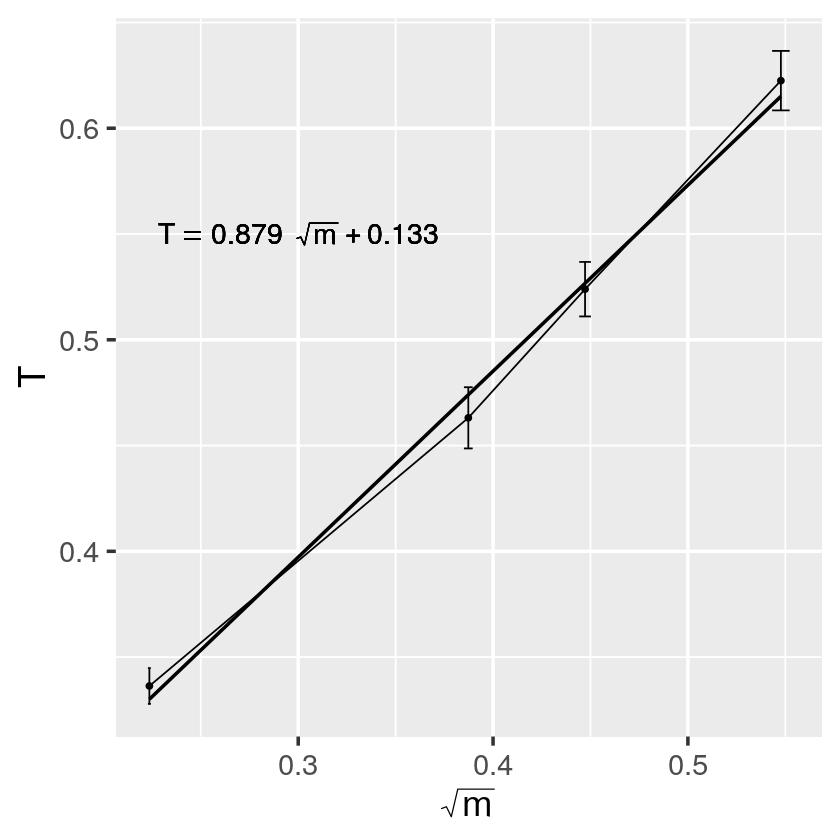

In [7]:
df_2 <- data.frame(masse = sqrt(c(0.05, 0.15, 0.20, 0.30)), periode = mittelwerte)

# Bestimmung von Steigung und T-Achsenabschnitt
# durch eine einfache lineare Regression
lr_2 <- lm(data = df_2, formula = periode ~ masse)
lr_2

p_2 <- ggplot(data = df_2, aes(x = masse, y = periode)) + 
       geom_line() + 
       geom_point() +
       geom_smooth(method = "lm", se = FALSE, color = "black", formula = y ~ x) +
       geom_text(x = 0.3, y = 0.55, label = expression(T==0.879~sqrt(m)+0.133), size = 6, parse = TRUE) +
       geom_errorbar(aes(ymin = periode - standard_abweichungen, 
                         ymax = periode + standard_abweichungen),
                     width = 0.03*c(0.05, 0.15, 0.20, 0.30))

p_2 + labs(x = expression(sqrt(m)), y = expression(T)) + theme_grey(base_size = 22)

---

**Bemerkung:** Am Anfang der Auswertung hätten wir auch die Ausreißer aus der Datenmenge entfernen können. Doch wir merkten, dass ihrer Einfluss auf die Endergebnisse in unserem Beispiel nicht besonders stark war. Wir versuchten, die Tabelle zu bereinigen wie unten gezeigt. Am Ende waren aber nur wenige Datenpunkte vorhanden für die Analyse und die resultierenden Darstellungen ziemlich ungenau. Da die Steigungen und Achsenabschnitte nicht sehr unterschiedlich waren, entschieden wir uns, alle Werte so zu lassen, wie sie in der Tabelle vorkommen.

```
fp_tabelle[which(fp_tabelle[2:11, 1] < 9.8)+1, 1] <- NA
fp_tabelle[which(fp_tabelle[2:11, 2] < 13.6)+1, 2] <- NA
fp_tabelle[which(fp_tabelle[2:11, 2] > 14.5)+1, 2] <- NA
fp_tabelle[which(fp_tabelle[2:11, 3] > 16)+1, 3] <- NA
fp_tabelle[which(fp_tabelle[2:11, 3] < 1)+1, 3] <- NA
fp_tabelle[which(fp_tabelle[2:11, 4] < 18)+1, 4] <- NA

fp_tabelle
```

---

## Zusatz: Auswertung ohne Ausreißer

Masse.kg,0.05,0.15,0.20,0.30
T30.1,NA,NA,NA,18.83
T30.2,10.49,NA,15.16,18.69
T30.3,10.10,14.00,15.59,18.83
T30.4,9.98,13.84,15.68,NA
T30.5,10.34,13.94,15.70,19.02
T30.6,10.00,NA,15.43,NA
T30.7,10.00,13.89,NA,18.96
T30.8,NA,NA,15.70,18.83
T30.9,NA,NA,NA,18.93
T30.10,NA,NA,NA,18.87



 Mittelwerte:   0.3383889  0.4639167  0.5181111  0.629
 Standardabweichungen:   0.007119353  0.002283191  0.007145058  0.003366502
 Fehler der Mittelwerte:   0.001186559  0.0005707978  0.001190843  0.0004208127
 Relative Fehler:   0.351%  0.123%  0.230%  0.067%


Call:
lm(formula = periode ~ masse, data = df)

Coefficients:
(Intercept)        masse  
    0.05206      1.12222  


Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”



Call:
lm(formula = periode ~ masse, data = df)

Coefficients:
(Intercept)        masse  
     0.1321       0.8849  


Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


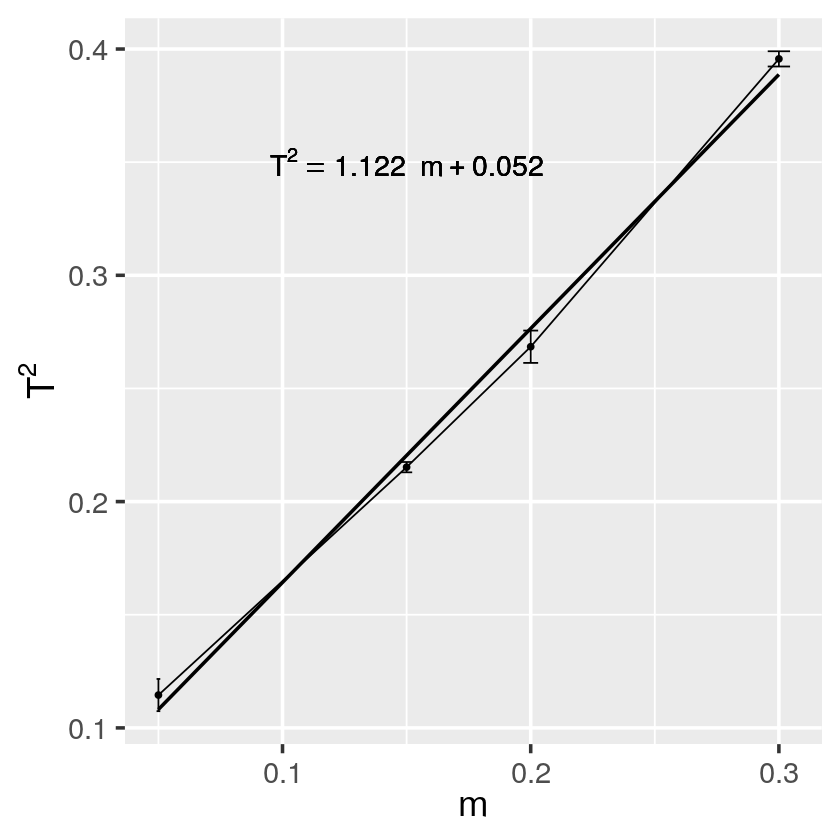

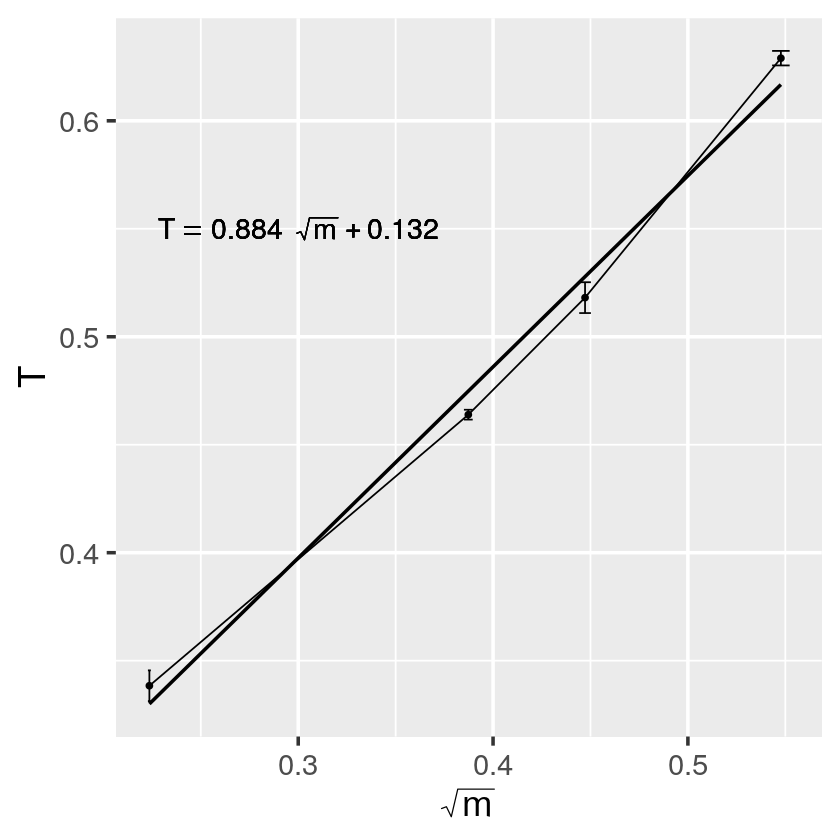

In [8]:
fp_tabelle_2 <- fp_tabelle
fp_tabelle_2[which(fp_tabelle_2[2:11, 1] < 9.8)+1, 1] <- NA
fp_tabelle_2[which(fp_tabelle_2[2:11, 2] < 13.6)+1, 2] <- NA
fp_tabelle_2[which(fp_tabelle_2[2:11, 2] > 14.5)+1, 2] <- NA
fp_tabelle_2[which(fp_tabelle_2[2:11, 3] > 16)+1, 3] <- NA
fp_tabelle_2[which(fp_tabelle_2[2:11, 3] < 1)+1, 3] <- NA
fp_tabelle_2[which(fp_tabelle_2[2:11, 4] < 18)+1, 4] <- NA

fp_tabelle_2



laenge_2 <- c()
mittelwerte_2 <- c()
standard_abweichungen_2 <- c()

for (k in 1:4) { 
  messungen_2 <- c(fp_tabelle_2[(which(fp_tabelle_2[2:11, k] != 'NA')+1), k])
  laenge_2 <- c(laenge_2, length(messungen_2))
  mittelwerte_2 <- c(mittelwerte_2, mean(messungen_2))
  standard_abweichungen_2 <- c(standard_abweichungen_2, sd(messungen_2))
}



mittelwerte_2 <- mittelwerte_2 / 30
standard_abweichungen_2 <- standard_abweichungen_2 / 30

fehler_mittel_2 <- standard_abweichungen_2 / laenge_2
rel_fehler_2 <- fehler_mittel_2 / mittelwerte_2

cat("\n Mittelwerte: ", mittelwerte_2, sep = "  ")
cat("\n Standardabweichungen: ", standard_abweichungen_2, sep = "  ")
cat("\n Fehler der Mittelwerte: ", fehler_mittel_2, sep = "  ")
cat("\n Relative Fehler: ", percent(rel_fehler_2), sep = "  ")



df <- data.frame(masse = c(0.05, 0.15, 0.20, 0.30), periode = mittelwerte_2^2)

# Bestimmung von Steigung und T^2-Achsenabschnitt
# durch eine einfache lineare Regression
lr <- lm(data = df, formula = periode ~ masse)
lr

p <- ggplot(data = df, aes(x = masse, y = periode)) + 
     geom_line() + 
     geom_point() +
     geom_smooth(method = "lm", se = FALSE, color = "black", formula = y ~ x) +
     geom_text(x = 0.15, y = 0.35, label = expression(T^2==1.122~m+0.052), size = 6, parse = TRUE) +
     geom_errorbar(aes(ymin = periode - standard_abweichungen_2, 
                       ymax = periode + standard_abweichungen_2),
                   width = 0.03*c(0.05, 0.15, 0.20, 0.30))

p + labs(x = expression(m), y = expression(T^2)) + theme_grey(base_size = 22)



df <- data.frame(masse = sqrt(c(0.05, 0.15, 0.20, 0.30)), periode = mittelwerte_2)

# Bestimmung von Steigung und T-Achsenabschnitt
# durch eine einfache lineare Regression
lr <- lm(data = df, formula = periode ~ masse)
lr

p <- ggplot(data = df, aes(x = masse, y = periode)) + 
     geom_line() + 
     geom_point() +
     geom_smooth(method = "lm", se = FALSE, color = "black", formula = y ~ x) +
     geom_text(x = 0.3, y = 0.55, label = expression(T==0.884~sqrt(m)+0.132), size = 6, parse = TRUE) +
     geom_errorbar(aes(ymin = periode - standard_abweichungen_2, 
                       ymax = periode + standard_abweichungen_2),
                   width = 0.03*c(0.05, 0.15, 0.20, 0.30))

p + labs(x = expression(sqrt(m)), y = expression(T)) + theme_grey(base_size = 22)